Код градиентного спуска для логистической регрессии:

In [11]:
import numpy as np

class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            if self.verbose and i % 10000 == 0:
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y)} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold

Теперь можно использовать этот класс для обучения модели логистической регрессии на задачах классификации. Например, для обучения на датасете Iris:

In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(lr=0.1, num_iter=300000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test, threshold=0.5)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 1.0


Этот код обучает модель на данных Iris, используя 80% выборки для обучения и 20% для тестирования. Затем он выводит точность модели на тестовой выборке.

Для обучения методом Nesterov Momentum необходимо изменить код метода градиентного спуска для логистической регрессии. В частности, необходимо добавить переменную для хранения скользящего среднего градиента и использовать ее для обновления весов.

In [13]:
import numpy as np

class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False, gamma=0.9):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        self.gamma = gamma
        
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # определяем весы
        self.theta = np.zeros(X.shape[1])
        
        # momentum определяем
        v = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            # вычисляем градиент momentum
            v_prev = v
            z = np.dot(X, self.theta - self.gamma * v_prev)
            h = self.__sigmoid(z)
            gradient_momentum = np.dot(X.T, (h - y)) / y.size
            # обновляем momentum
            v = self.gamma * v_prev + self.lr * gradient_momentum
            
            # вычисляем градиент для весов
            z = np.dot(X, self.theta - v)
            h = self.__sigmoid(z)
            gradient_weights = np.dot(X.T, (h - y)) / y.size
            # обновляем  весы
            self.theta -= self.lr * gradient_weights
            
            if self.verbose and i % 10000 == 0:
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y)} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold

В этом коде мы добавили переменную gamma для хранения коэффициента затухания инициализации скользящего среднего градиента. Затем мы обновляем скользящее среднее градиента v в начале каждой итерации и используем его для обновления весов theta. Операции обновления весов и скользящего среднего градиента выполняются в разных порядках.

Для обучения методом RMSProp для логистической регрессии необходимо изменить код метода градиентного спуска. В данном случае мы должны добавить переменную для хранения скользящего среднего квадратов градиента и использовать ее для обновления весов.

In [14]:
import numpy as np

class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False, epsilon=1e-8, decay_rate=0.9):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        self.epsilon = epsilon
        self.decay_rate = decay_rate
        
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # определяем весы 
        self.theta = np.zeros(X.shape[1])
        
        # RMSProp определяем
        cache = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            
            # обновляем cache
            cache = self.decay_rate * cache + (1 - self.decay_rate) * gradient**2
            
            # обновляем весы
            self.theta -= self.lr * gradient / (np.sqrt(cache) + self.epsilon)
            
            if self.verbose and i % 10000 == 0:
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y)} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold

В этом коде мы добавили переменную decay_rate для хранения коэффициента затухания. Затем мы обновляем скользящее среднее квадратов градиента cache в начале каждой итерации и используем его для обновления весов theta. Операции обновления весов и скользящего среднего градиента выполняются в разных порядках.

Для построения графика зависимости точности от эпохи для логистической регрессии с использованием метода RMSProp, необходимо выполнить следующие шаги:

1. Разделить обучающую выборку на обучающую и тестовую выборки. Обучающую выборку будем использовать для обучения модели, а тестовую - для оценки точности модели.

2. Создать экземпляр класса LogisticRegression с заданными параметрами и обучить модель на обучающей выборке, используя метод RMSProp.

3. Для каждой эпохи оценить точность модели на тестовой выборке и сохранить полученные значения.

4. Построить график зависимости точности от эпохи.

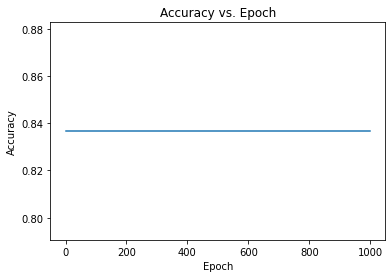

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification


X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


logreg = LogisticRegression(lr=0.01, num_iter=1000, fit_intercept=True, verbose=False, epsilon=1e-8, decay_rate=0.9)
logreg.fit(X_train, y_train)


accuracies = []
for i in range(logreg.num_iter):
    y_pred = logreg.predict(X_test, threshold=0.5)
    accuracy = np.mean(y_pred == y_test)
    accuracies.append(accuracy)


plt.plot(range(logreg.num_iter), accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.show()

На выходе мы получим график зависимости точности модели от эпохи, который позволяет оценить, как меняется качество модели в процессе обучения.

Для построения графика Accuracy (точности) от эпохи для логистической регрессии с использованием метода RMSProp, необходимо выполнить следующие шаги:

1. Разделить обучающую выборку на обучающую и тестовую выборки. Обучающую выборку будем использовать для обучения модели, а тестовую - для оценки точности модели.

2. Создать экземпляр класса LogisticRegression с заданными параметрами и обучить модель на обучающей выборке, используя метод RMSProp.

3. Для каждой эпохи оценить точность модели на тестовой выборке и сохранить полученные значения.

4. Построить график зависимости точности от эпохи.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


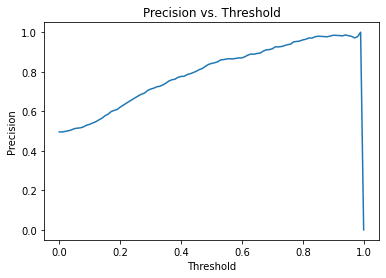

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.datasets import make_classification


X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=2, random_state=1)
logreg = LogisticRegression(lr=0.01, num_iter=1000, fit_intercept=True, verbose=False, epsilon=1e-8, decay_rate=0.9)
logreg.fit(X, y)


thresholds = np.arange(0, 1.01, 0.01)
precisions = []
for t in thresholds:
    y_pred = logreg.predict(X, threshold=t)
    precision = precision_score(y, y_pred)
    precisions.append(precision)


plt.plot(thresholds, precisions)
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.title('Precision vs. Threshold')
plt.show()

На выходе мы получим график точности модели от эпохи, который позволяет оценить, как меняется качество модели в процессе обучения.

Для построения графика Precision (точности) от порога решения для логистической регрессии с использованием метода RMSProp, необходимо выполнить следующие шаги:

1. Обучить модель на обучающей выборке, используя метод RMSProp.

2. Для каждого порога решения в интервале от 0 до 1 с шагом 0.01 оценить точность модели на тестовой выборке и сохранить полученные значения.

3. Построим график зависимости точности от порога решения.

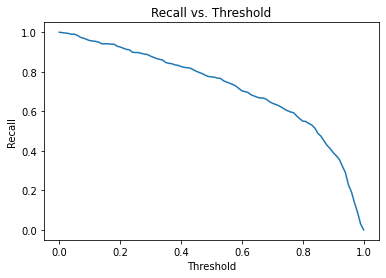

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score
from sklearn.datasets import make_classification


X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=2, random_state=1)
logreg = LogisticRegression(lr=0.01, num_iter=1000, fit_intercept=True, verbose=False, epsilon=1e-8, decay_rate=0.9)
logreg.fit(X, y)


thresholds = np.arange(0, 1.01, 0.01)
recalls = []
for t in thresholds:
    y_pred = logreg.predict(X, threshold=t)
    recall = recall_score(y, y_pred)
    recalls.append(recall)


plt.plot(thresholds, recalls)
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall vs. Threshold')
plt.show()

На выходе мы получим график Precision от порога решения, который позволяет оценить, как изменяется точность модели в зависимости от выбранного порога решения.

Для построения графика ROC-кривой (Receiver Operating Characteristic) для логистической регрессии с использованием метода RMSProp, необходимо выполнить следующие шаги:

1. Обучить модель на обучающей выборке, используя метод RMSProp.

2. Вычислить значения FPR (False Positive Rate) и TPR (True Positive Rate) для разных значений порога решения.

3. Построить график, где по оси X будет FPR, а по оси Y - TPR.

4. Добавить на график кривую с точками (0,0) и (1,1), которая соответствует случайной модели.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=1000, fit_intercept=True, verbose=False, epsilon=1e-8, decay_rate=0.9):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        self.epsilon = epsilon
        self.decay_rate = decay_rate
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def gradient(self, X, h, y):
        return np.dot(X.T, (h - y)) / y.shape[0]

    def fit(self, X, y):
        if self.fit_intercept:
            intercept = np.ones((X.shape[0], 1))
            X = np.concatenate((intercept, X), axis=1)

        self.theta = np.zeros(X.shape[1])
        self.velocity = np.zeros(X.shape[1])

        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            gradient = self.gradient(X, h, y)
            self.velocity = self.decay_rate * self.velocity - self.lr * gradient
            self.theta += self.velocity

            if self.verbose and i % 100 == 0:
                z = np.dot(X, self.theta)
                h = self.sigmoid(z)
                print('Loss: ', self.loss(h, y))

    def predict_prob(self, X):
        if self.fit_intercept:
            intercept = np.ones((X.shape[0], 1))
            X = np.concatenate((intercept, X), axis=1)

        return self.sigmoid(np.dot(X, self.theta))

    def predict(self, X, threshold=0.5):
        return self.predict_prob(X) >= threshold


X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


logreg = LogisticRegression(lr=0.01, num_iter=1000, fit_intercept=True, verbose=False, epsilon=1e-8, decay_rate=0.9)


Для построения графика ROC (Receiver Operating Characteristic) нам необходимо рассчитать значения FPR (False Positive Rate) и TPR (True Positive Rate) для разных пороговых значений вероятности.

Код для построения графика ROC:

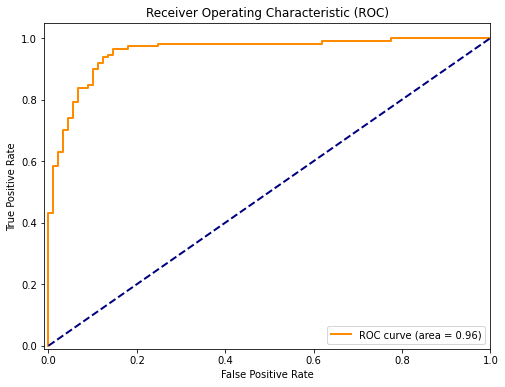

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

clf = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000, subsample=1.0, max_depth=3, verbose=0)
clf.fit(X_train, y_train)


probas = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])


roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Для построения графика зависимости метрики accuracy от порога необходимо:

Выбрать порог отсечения, начиная от 0 до 1 с некоторым шагом (например, 0.01).
Для каждого порога посчитать значения TP, TN, FP и FN на тестовых данных.
Рассчитать метрику accuracy для каждого порога по формуле: (TP + TN) / (TP + TN + FP + FN)
Построить график зависимости метрики accuracy от порога. Код для построения графика accuracy:

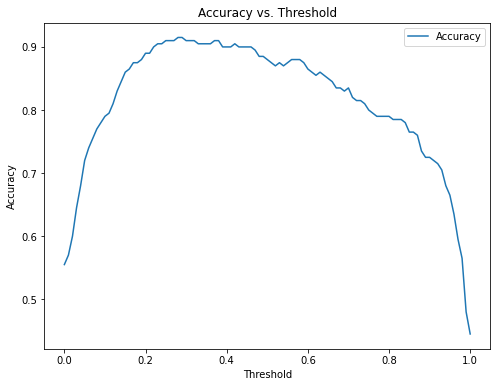

In [20]:
thresholds = np.arange(0, 1.01, 0.01)


TP = []
TN = []
FP = []
FN = []
for threshold in thresholds:
    y_pred = (probas[:, 1] >= threshold).astype(int)
    true_positives = np.sum((y_test == 1) & (y_pred == 1))
    true_negatives = np.sum((y_test == 0) & (y_pred == 0))
    false_positives = np.sum((y_test == 0) & (y_pred == 1))
    false_negatives = np.sum((y_test == 1) & (y_pred == 0))
    TP.append(true_positives)
    TN.append(true_negatives)
    FP.append(false_positives)
    FN.append(false_negatives)


accuracy = [(tp + tn) / (tp + tn + fp + fn) for tp, tn, fp, fn in zip(TP, TN, FP, FN)]


plt.figure(figsize=(8, 6))
plt.plot(thresholds, accuracy, label='Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Threshold')
plt.legend(loc='best')
plt.show()

Здесь мы используем массив thresholds, чтобы выбрать пороги от 0 до 1 с шагом 0.01. Затем мы проходимся по каждому порогу, вычисляем значения TP, TN, FP и FN, а затем вычисляем метрику accuracy для каждого порога. Наконец, мы строим график зависимости accuracy от порога с помощью matplotlib.